<a href="https://colab.research.google.com/github/MikolajKasprzyk/data_science_bootcamp/blob/main/05_uczenie_maszynowe_sklearn/07_k_najblizszych_sasiadow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
sns.set()

### <a name='a2'></a> K-nearest Neighbour Algorithm - Algorytm K-najbliższych sąsiadów

Podstawą działania algorytmu jest:
* znalezienie z góry określonej liczby próbek treningowych znajdujących się najbliżej naszej obserwacji
* przewidzenie na ich podstawie etykiety

Liczba sąsiadów jest określana przez użytkownika. Odległości zwykle kalkuluje sie przy pomocy metryki euklidesowej.

In [ ]:
from sklearn.datasets import load_iris
raw_data = load_iris()
raw_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
raw_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
raw_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
df1 = pd.DataFrame(data=raw_data.data, columns=raw_data.feature_names)
df2 = pd.DataFrame(data=raw_data.target, columns=['class'])
df = pd.concat([df1, df2], axis=1)

In [ ]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


## Wykres rozproszenia

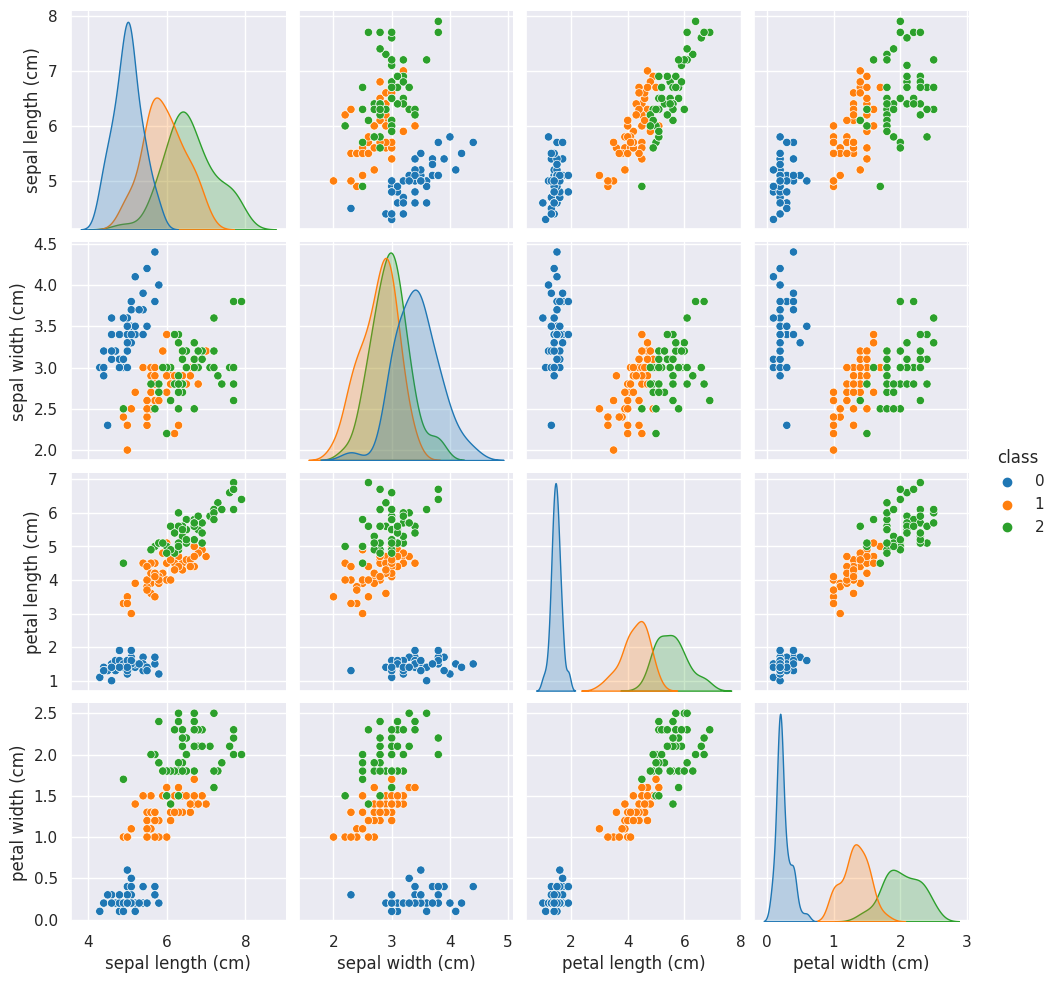

In [ ]:
sns.pairplot(df, hue='class', palette='tab10')

In [ ]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
class,0.782561,-0.426658,0.949035,0.956547,1.000000


In [ ]:
# odzrzucamy dwie najlepiej skorelowane kolumny z powodow edukacyjnych,
# zasadniczo byłyby one najlepsze do predykcji

X = raw_data.data
X = X[:, :2] # zostaja dwie pierwsze kolumny

y = raw_data.target

print(X.shape)
print(y.shape)

(150, 2)
(150,)


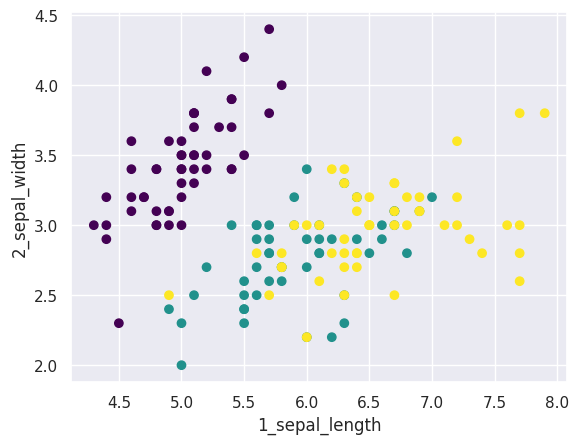

In [ ]:
# nie dzielimy na dane testowe i treningowe bo patrzymy tylko jak model działa
# wiec jest to just for fun
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis') # c=y kolor to klasa/gatunek zapisana w zmiennej y
plt.xlabel('1_sepal_length')
plt.ylabel('2_sepal_width')
plt.show()

In [ ]:
#robimy to samo przy pomocy plotly express
df = pd.DataFrame(X, columns=['sepal_length', 'sepal_width'])
target = pd.DataFrame(y, columns=['class'])
df = pd.concat([df, target], axis=1)
px.scatter(df, x='sepal_length', y='sepal_width', color='class', width=600, height=400)

# K-nearest neigbours classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier()
classifier.fit(X, y)
classifier.score(X, y)

0.84

## Wykres granic decyzyjnych

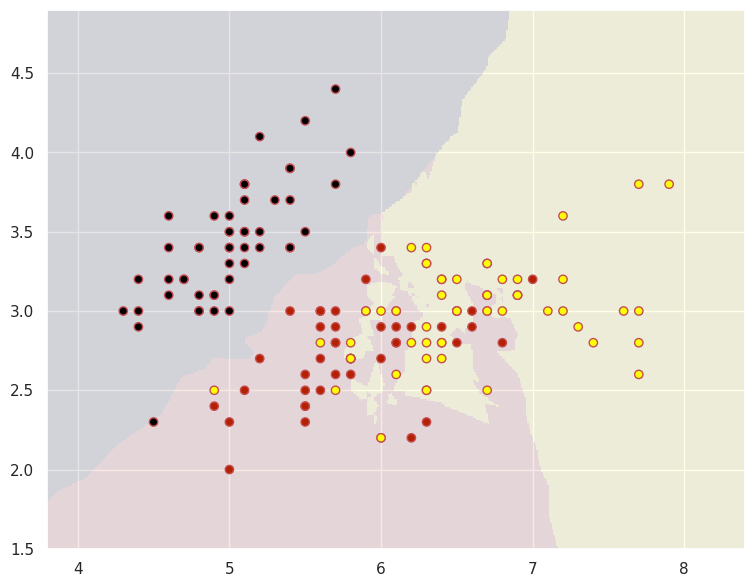

In [ ]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = classifier.predict(mesh)
Z = Z.reshape(xx.shape)
plt.figure(figsize=(9, 7))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

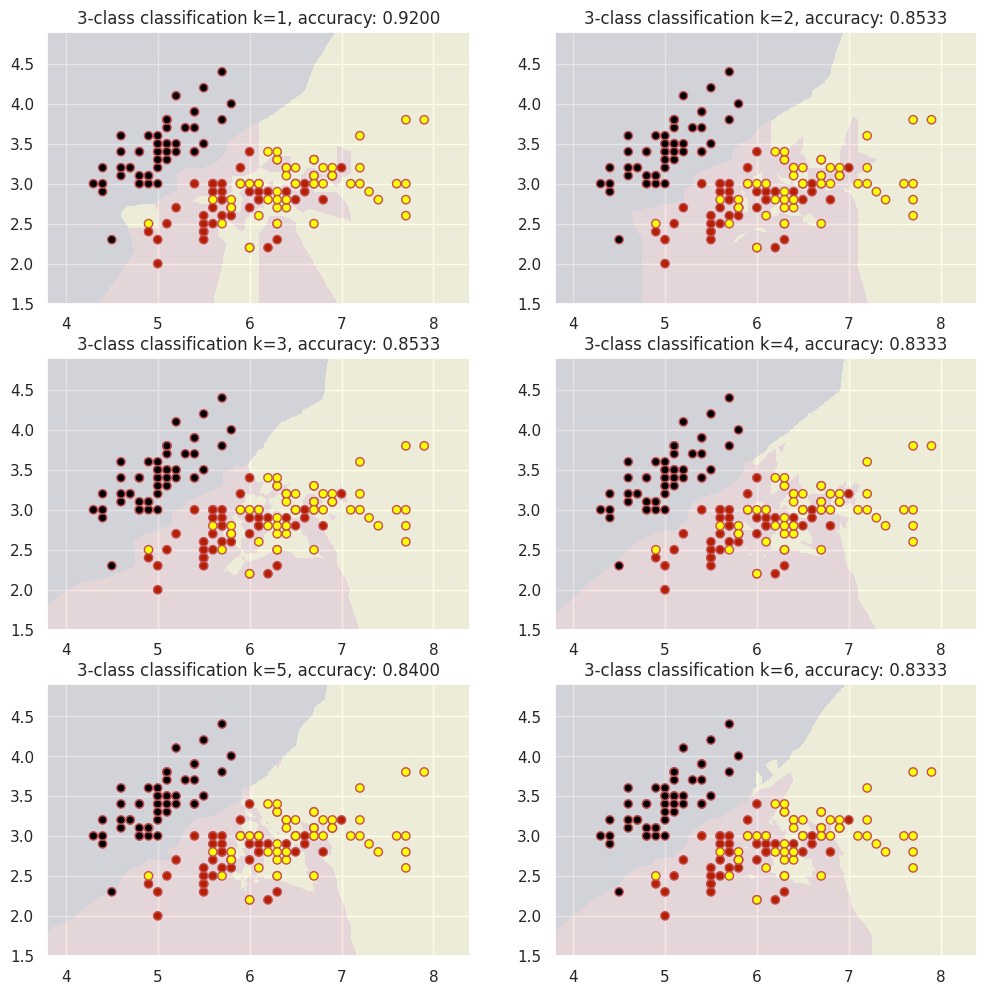

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(1, 7):
    plt.subplot(3, 2, i)
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X, y)
    accuracy = classifier.score(X, y)
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    mesh = np.c_[xx.ravel(), yy.ravel()]
    Z = classifier.predict(mesh)
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gnuplot', edgecolors='r')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f'3-class classification k={i}, accuracy: {accuracy:.4f}')
plt.show()

In [ ]:
# tu mozna sie spodziewac ze dla k=1 mimo najwiekszej dokladnosci jest mocno overfitted
# zeby przeszukac siatke mozna uzyc gotowej funkcji z biblioteki


## Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_params = {'n_neighbors': range(2, 30)} #n_neighbors to parametr dla GridSeachCV, musi sie tak nazywac
classifier = KNeighborsClassifier()
gs = GridSearchCV(classifier, grid_params, cv=6)
# cv - cross validation dzieli dane na 3 czesci, trenuje na dwoch czesciach i
# sprawdzaa na trzeciej, robi to dla kazdej kombinacji
gs.fit(X, y)

GridSearchCV(cv=6, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 30)})

In [ ]:
 k = gs.best_params_ # zwraca najlepszy parametr n_neighbors
 k

In [ ]:
classifier = gs.best_estimator_ # zwraca najlepszy model wg frid search
classifier

KNeighborsClassifier(n_neighbors=9)

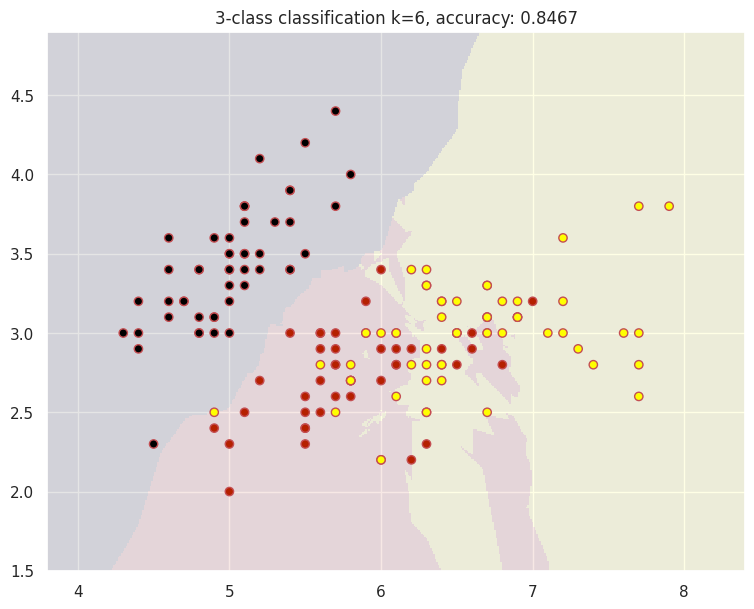

In [ ]:
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
mesh = np.c_[xx.ravel(), yy.ravel()]
Z = classifier.predict(mesh)
Z = Z.reshape(xx.shape)
accuracy = classifier.score(X, y)

plt.figure(figsize=(9, 7))
plt.pcolormesh(xx, yy, Z, cmap='gnuplot', alpha=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='gnuplot', edgecolors='r')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title(f'3-class classification k={i}, accuracy: {accuracy:.4f}')
plt.show()